In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:

data = pd.read_csv("C:/Users/USER/Desktop/projects/encryptix/Titanic-Dataset.csv")

In [7]:
#label encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convert sex to numeric
data = data[['Age', 'Sex', 'Pclass', 'Survived']].dropna()  # Keep only the relevant columns and drop rows with missing values

In [8]:
#feature and target variable
X = data[['Age', 'Sex', 'Pclass']]
y = data['Survived']


In [9]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
#standardize/normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

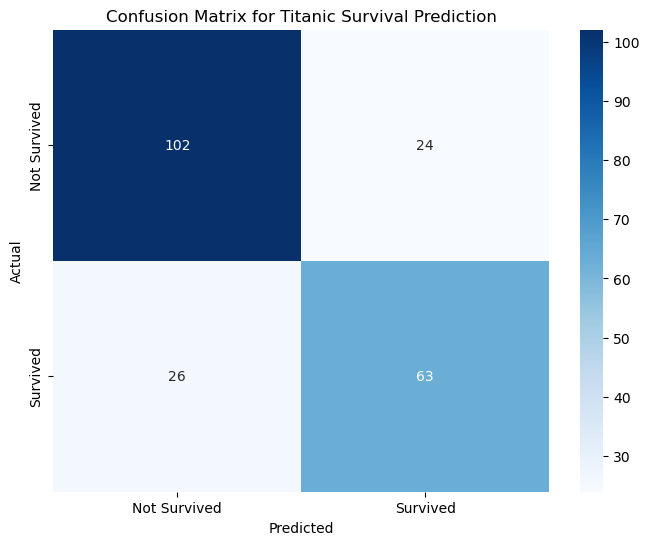

In [16]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


# Predict on the test data
y_pred = model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

In [ ]:
#accuracy testing
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       126
           1       0.72      0.71      0.72        89

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



In [ ]:
#predicting survival rate based on age,sex and pclass
def predict_survival(age, sex, pclass):
    # Convert new data to DataFrame
    sex_encoded = label_encoder.transform([sex])[0]
    new_data = pd.DataFrame([[age, sex_encoded, pclass]],
                            columns=['Age', 'Sex', 'Pclass'])
    # Standardize the input features
    new_data = scaler.transform(new_data)
    # Predict survival
    prediction = model.predict(new_data)[0]
    return prediction

# Take input from the user
age = float(input("Enter age: "))
sex = input("Enter sex (male/female): ").lower()
pclass = int(input("Enter pclass (1, 2, or 3): "))

# Check if sex is valid
if sex not in ['male', 'female']:
    print("Invalid sex input. Please enter 'male' or 'female'.")
else:
    # Make the prediction
    prediction = predict_survival(age, sex, pclass)
    print(f"Prediction for age={age}, sex={sex}, pclass={pclass}: {'Survived' if prediction == 1 else 'Not Survived'}")

Prediction for age=22.0, sex=male, pclass=3: Not Survived


**Exploratory Analysis**

**BAR PLOT**

C:\Users\USER\AppData\Local\Temp\ipykernel_1460\229852952.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = data.groupby('AgeGroup')['Survived'].mean()


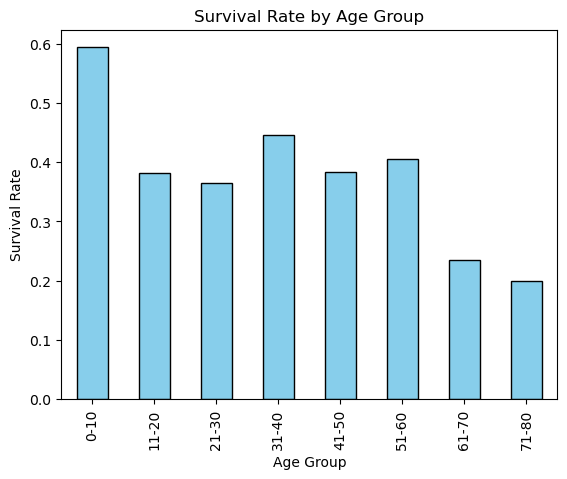

In [20]:
# Drop rows where 'Age' is missing
data.dropna(subset=['Age'], inplace=True)

# Create age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Calculate survival rates for each age group
age_group_survival = data.groupby('AgeGroup')['Survived'].mean()

# Plot the bar graph
age_group_survival.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Display the plot
plt.show()

**HEAT MAP**

In [ ]:
corr_matrix = data.corr()

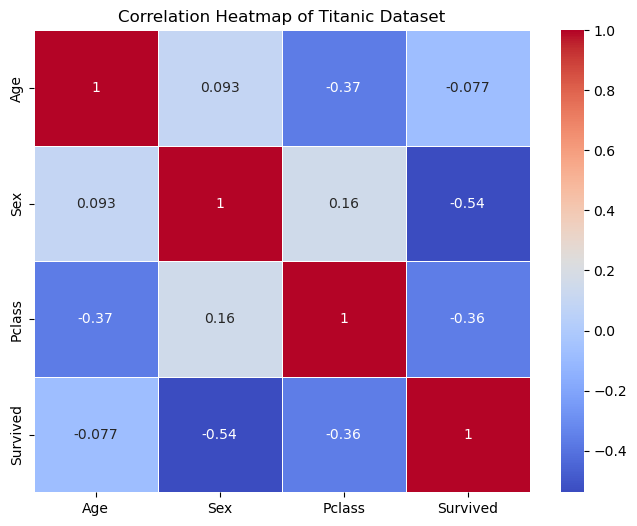

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()